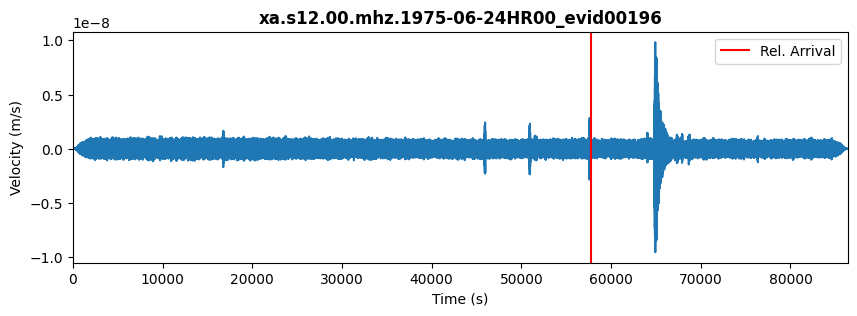

In [2]:
# Import libraries
import numpy as np
import pandas as pd
from obspy import read
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import os
import glob

data_directory = './data/lunar/data/test/data/S15_GradeA/'
row = glob.glob(os.path.join(data_directory, '*.mseed'))

##################################################################
# for i in range(75):
file_name = "xa.s15.00.mhz.1973-08-10HR00_evid00126.csv"
processed_csv = "./data/lunar/data/test/data/S15_GradeA/xa.s15.00.mhz.1973-08-10HR00_evid00126.csv"

cat_directory = './data/lunar/data/training/catalogs/'
cat_file = cat_directory + 'apollo12_catalog_GradeA_final.csv'
cat = pd.read_csv(cat_file)
cat

row = cat.iloc[i]
test_filename = row.filename

csv_file = f'{processed_csv}'
raw_data = pd.read_csv(csv_file)

csv_times = np.array(raw_data['time_rel(sec)'].tolist())
csv_data = np.array(raw_data['velocity(m/s)'].tolist())

fig,ax = plt.subplots(1,1,figsize=(10,3))
ax.plot(csv_times,csv_data)

# Make the plot pretty
ax.set_xlim([min(csv_times),max(csv_times)])
ax.set_ylabel('Velocity (m/s)')
ax.set_xlabel('Time (s)')
ax.set_title(f'{test_filename}', fontweight='bold')



# print (test_filename)
arrival_time = datetime.strptime(row['time_abs(%Y-%m-%dT%H:%M:%S.%f)'],'%Y-%m-%dT%H:%M:%S.%f')
arrival_time

arrival_time_rel = row['time_rel(sec)']
# Plot where the arrival time is
arrival_line = ax.axvline(x=arrival_time_rel, c='red', label='Rel. Arrival')
ax.legend(handles=[arrival_line])

In [3]:
test_filename = row[2]
print(test_filename)

mseed_file = f'{test_filename}'
st = read(mseed_file)
st

C:\Users\alvan\AppData\Local\Temp\ipykernel_20712\2345653748.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  test_filename = row[2]


57780.0


FileNotFoundError: [Errno 2] No such file or directory: '57780.0'

[-7.72604043e-16 -9.17117279e-16 -9.75536667e-16 ... -2.76261666e-16
 -3.57389999e-16 -5.13396128e-16]


C:\Users\alvan\AppData\Local\Temp\ipykernel_22068\1861032617.py:13: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend(loc='upper left')


Text(0.5, 1.0, './data/lunar/data/test/data/S15_GradeA\\xa.s15.00.mhz.1973-10-27HR00_evid00134.mseed')

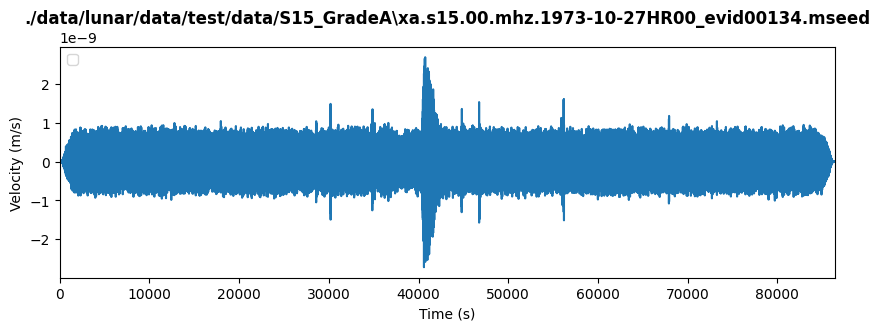

In [16]:
# This is how you get the data and the time, which is in seconds
tr = st.traces[0].copy()
tr_times = tr.times()
tr_data = tr.data
print(tr_data)

# Initialize figure
fig,ax = plt.subplots(1,1,figsize=(10,3))

# Plot trace
ax.plot(tr_times,tr_data)

ax.legend(loc='upper left')

# Make the plot pretty
ax.set_xlim([min(tr_times),max(tr_times)])
ax.set_ylabel('Velocity (m/s)')
ax.set_xlabel('Time (s)')
ax.set_title(f'{test_filename}', fontweight='bold')